# Machine Learning from Disaster: Titanic Dataset

# Imports

In [1]:
import numpy as np
import pandas as pd

np.random.seed(69)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [3]:
data = pd.read_csv("./titanic_data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis

In [8]:
data.shape

(891, 12)

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


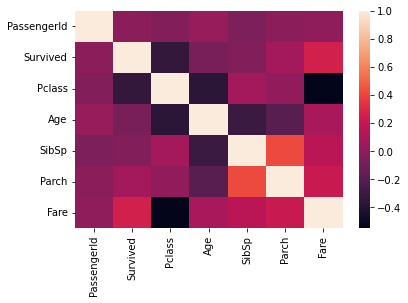

In [12]:
correlations_data = data.corr()
sns.heatmap(correlations_data)
plt.show()

Now, we do a bit of data analysis to check the out the individual features (to gain impormation regarding some interesting attributes).

### `Pclass`

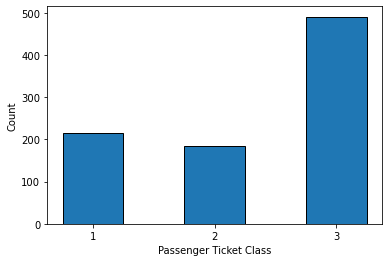

In [28]:
plt.figure()
plt.hist(data['Pclass'], bins=[0.75,1.25, 1.75,2.25, 2.75,3.25] ,align='mid', edgecolor='k')
# 'bins' specify the bin boundaries
plt.xticks([1,2,3])
plt.xlabel("Passenger Ticket Class")
plt.ylabel("Count")
plt.show()

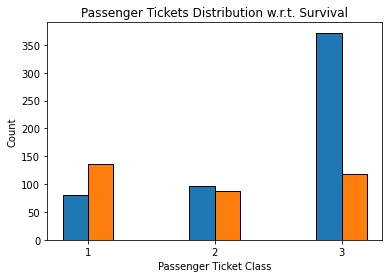

In [39]:
plt.figure()
data_1 = data['Pclass'][data['Survived'] == 0]
data_2 = data['Pclass'][data['Survived'] == 1]
plt.hist([data_1, data_2], bins=[0.75,1.25, 1.75,2.25, 2.75,3.25] ,align='mid', edgecolor='k')
plt.xticks([1,2,3])
plt.xlabel("Passenger Ticket Class")
plt.ylabel("Count")
plt.title("Passenger Tickets Distribution w.r.t. Survival")
plt.show()

As we can infer from this, a large ratio of 3rd class passengers did not survive as compared to passengers with 1st and 2nd class tickets. Since, there seems to be a preference of survival of one class over the other, we will label encode this attribute.

### `Sex`

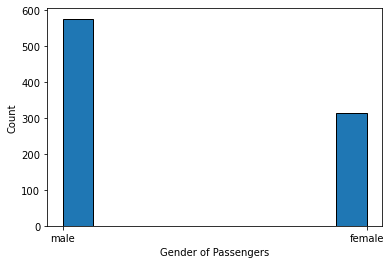

In [33]:
plt.figure()
plt.hist(data['Sex'], align='mid', edgecolor='k')
plt.xlabel("Gender of Passengers")
plt.ylabel("Count")
plt.show()

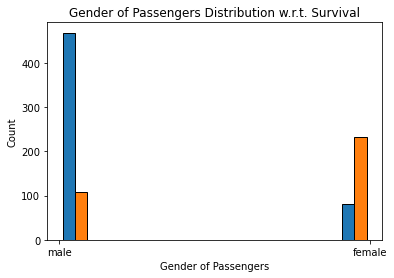

In [40]:
plt.figure()
data_1 = data['Sex'][data['Survived'] == 0]
data_2 = data['Sex'][data['Survived'] == 1]
plt.hist([data_1, data_2] ,align='mid', edgecolor='k')
plt.xlabel("Gender of Passengers")
plt.ylabel("Count")
plt.title("Gender of Passengers Distribution w.r.t. Survival")
plt.show()

As we can clearly infer from the data, female passengers have way better survival ratio than male passengers, hence label encoding this attribute makes sense again.

### `Age`

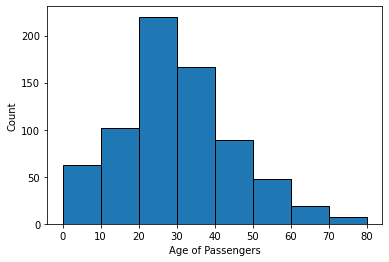

In [37]:
plt.figure()
plt.hist(data['Age'], bins=np.arange(0,90,10), align='mid', edgecolor='k')
plt.xlabel("Age of Passengers")
plt.ylabel("Count")
plt.show()

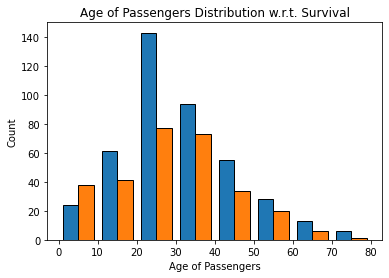

In [41]:
plt.figure()
data_1 = data['Age'][data['Survived'] == 0]
data_2 = data['Age'][data['Survived'] == 1]
plt.hist([data_1, data_2], bins=np.arange(0,90,10) ,align='mid', edgecolor='k')
plt.xlabel("Age of Passengers")
plt.ylabel("Count")
plt.title("Age of Passengers Distribution w.r.t. Survival")
plt.show()

This shows that the survival rate of kids is way better than population of other ages.

### `SibSp`

We check on the stats of survival of people with and without siblings/spouses, by converting this into a binary attribute.

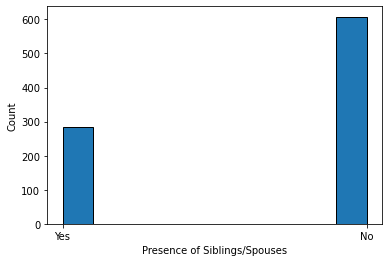

In [52]:
SibSp_mod = np.where(data['SibSp'] > 0, 'Yes', 'No')
plt.hist(SibSp_mod, align='mid', edgecolor='k')
plt.xlabel("Presence of Siblings/Spouses")
plt.ylabel("Count")
plt.show()

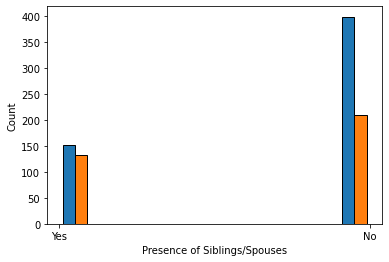

In [54]:
plt.figure()
data_1 = SibSp_mod[data['Survived'] == 0]
data_2 = SibSp_mod[data['Survived'] == 1]
plt.hist([data_1, data_2],align='mid', edgecolor='k')
plt.xlabel("Presence of Siblings/Spouses")
plt.ylabel("Count")
plt.show()

We can see that the presence of siblings/spouses has resulted in better survival rates than the ones without these.

### `Parch`

We check on the stats of survival of people with and without parents/children, by converting this into a binary attribute.

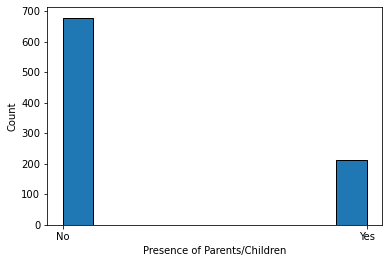

In [53]:
Parch_mod = np.where(data['Parch'] > 0, 'Yes', 'No')
plt.hist(Parch_mod, align='mid', edgecolor='k')
plt.xlabel("Presence of Parents/Children")
plt.ylabel("Count")
plt.show()

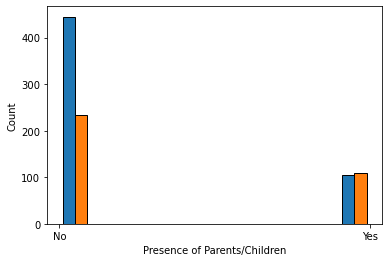

In [55]:
plt.figure()
data_1 = Parch_mod[data['Survived'] == 0]
data_2 = Parch_mod[data['Survived'] == 1]
plt.hist([data_1, data_2],align='mid', edgecolor='k')
plt.xlabel("Presence of Parents/Children")
plt.ylabel("Count")
plt.show()

Again we see that the presence of parents/children has resulted in better survival rates than the ones without these.

This raises a suspicion that maybe mere presence or absence of a family member may act as an important factor. This is what we check next.

### `Family`

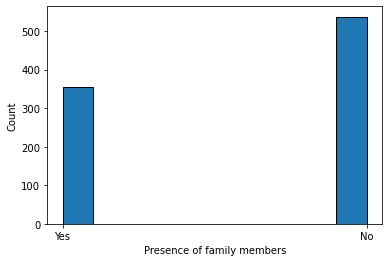

In [56]:
Fam_mod = np.where(data['Parch'] + data['SibSp'] > 0, 'Yes', 'No')
plt.hist(Fam_mod, align='mid', edgecolor='k')
plt.xlabel("Presence of family members")
plt.ylabel("Count")
plt.show()

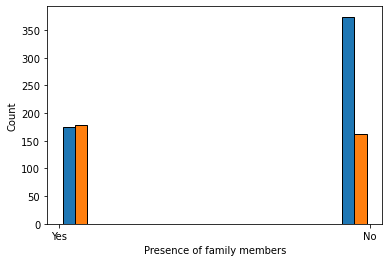

In [57]:
plt.figure()
data_1 = Fam_mod[data['Survived'] == 0]
data_2 = Fam_mod[data['Survived'] == 1]
plt.hist([data_1, data_2],align='mid', edgecolor='k')
plt.xlabel("Presence of family members")
plt.ylabel("Count")
plt.show()

As confirmed by this bar graph, we can just focus on presence or absence of family members as presence of family members reflects to a higher chance of survival.

We may even benefit by dropping the `Parch` and `SibSp` columns and instead replace these with `Fam_mod` column via label encoding.

### `Fare`

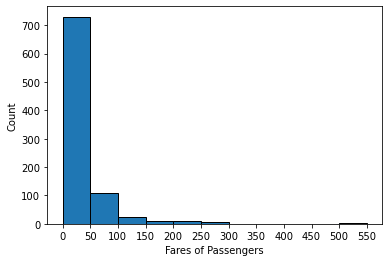

In [63]:
plt.figure()
plt.hist(data['Fare'], np.arange(0,600,50), align='mid', edgecolor='k')
plt.xticks(np.arange(0,600,50))
plt.xlabel("Fares of Passengers")
plt.ylabel("Count")
plt.show()

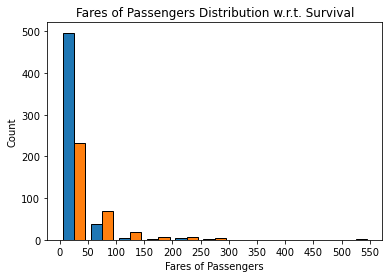

In [65]:
plt.figure()
data_1 = data['Fare'][data['Survived'] == 0]
data_2 = data['Fare'][data['Survived'] == 1]
plt.hist([data_1, data_2], np.arange(0,600,50) ,align='mid', edgecolor='k')
plt.xticks(np.arange(0,600,50))
plt.xlabel("Fares of Passengers")
plt.ylabel("Count")
plt.title("Fares of Passengers Distribution w.r.t. Survival")
plt.show()

We can see a definite pattern emerging here. Passengers with more expensive fares had far more chances of surviving than the ones with less fare.

### `Embarked`

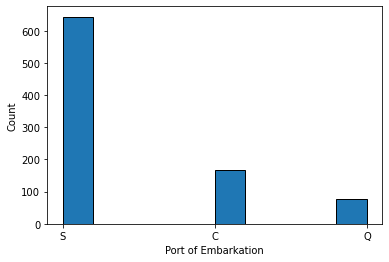

In [72]:
Embarked_mod = data['Embarked'].dropna()
plt.figure()
plt.hist(Embarked_mod, align='mid', edgecolor='k')
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

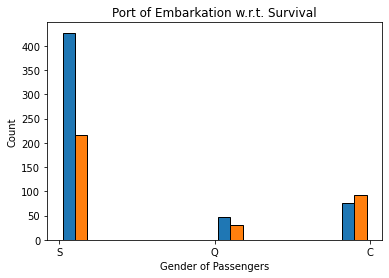

In [73]:
plt.figure()
data_1 = data['Embarked'][data['Survived'] == 0].dropna()
data_2 = Embarked_mod[data['Survived'] == 1].dropna()
plt.hist([data_1, data_2] ,align='mid', edgecolor='k')
plt.xlabel("Gender of Passengers")
plt.ylabel("Count")
plt.title("Port of Embarkation w.r.t. Survival")
plt.show()

We can see passengers who boarded from `'S':Southampton` had a much higher chance of dying as compared to other passengers.

Finally, let's take a look at the target variable.

### `Survived`

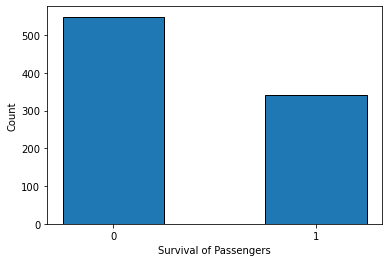

In [78]:
plt.figure()
plt.hist(data['Survived'], bins=[-0.25,0.25, 0.75,1.25]  ,align='mid', edgecolor='k')
plt.xticks([0,1])
plt.xlabel("Survival of Passengers")
plt.ylabel("Count")
plt.show()

This is an imbalanced data. We will check whether oversampling improves the performance or not later.

# Data Preprocessing

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
pass_col = ['Pclass']
sex_col = ['Sex']
age_col = ['Age']
fare_col = ['Fare']
embarked_col = ['Embarked']

In [6]:
embarked_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe_embarked', OneHotEncoder())
])

In [7]:
combined_pipe = ColumnTransformer([
    ('pass', 'passthrough', pass_col),
    ('sex', OrdinalEncoder(), sex_col),
    ('age', SimpleImputer(strategy='mean'), age_col),
    ('fare', StandardScaler(), fare_col),
    ('embarked', embarked_pipe, embarked_col)
])

In [8]:
from sklearn import set_config
set_config(display='diagram')
combined_pipe

ColumnTransformer(transformers=[('pass', 'passthrough', ['Pclass']),
                                ('sex', OrdinalEncoder(), ['Sex']),
                                ('age', SimpleImputer(), ['Age']),
                                ('fare', StandardScaler(), ['Fare']),
                                ('embarked',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe_embarked',
                                                  OneHotEncoder())]),
                                 ['Embarked'])])

In [9]:
data_new = combined_pipe.fit_transform(data)
data_new.shape

(891, 7)

We now put all the relevant preprocessing steps into a single function.

In [10]:
def pre_process(data, test_size = 0.15, degree=None):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder ,PolynomialFeatures
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import train_test_split

    data['Fam'] = np.where(data['Parch'] + data['SibSp'] > 0, 1, 0)
    target = np.array(data['Survived'])
    
    pass_col = ['Pclass', 'Fam']
    sex_col = ['Sex']
    age_col = ['Age']
    fare_col = ['Fare']
    embarked_col = ['Embarked']

    embarked_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe_embarked', OneHotEncoder())
    ])

    combined_pipe = ColumnTransformer([
        ('pass', 'passthrough', pass_col),
        ('sex', OrdinalEncoder(), sex_col),
        ('age', SimpleImputer(strategy='mean'), age_col),
        ('fare', StandardScaler(), fare_col),
        ('embarked', embarked_pipe, embarked_col)
    ])

    data = combined_pipe.fit_transform(data)
    if degree != None:
        data = PolynomialFeatures(degree=degree).fit_transform(data)

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, random_state=69)

    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = pre_process(data)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(757, 8) (757,)
(134, 8) (134,)


# Training the model

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

clf = LogisticRegression(solver='liblinear')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_micro')

print("%0.2f average train f1_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("Test f1_score of %0.2f" % (f1_score(y_test, y_test_hat)))

0.70 average train f1_score with a standard deviation of 0.02
Test f1_score of 0.67


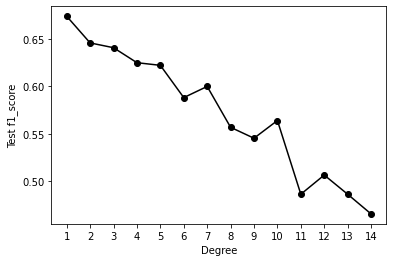

In [53]:
deg_list = np.arange(1,15)
score_list = []

for d in deg_list:
    X_train, X_test, y_train, y_test = pre_process(data, degree=d)
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    score_list.append(f1_score(y_test, y_test_hat))

plt.figure()
plt.plot(deg_list, score_list, marker='o', c='k')
plt.xlabel("Degree")
plt.xticks(np.arange(1,15))
plt.ylabel("Test f1_score")
plt.show()

It seems `LogisticRegresson` works best on the default data.

In [22]:
logreg_clf = LogisticRegression(solver='liblinear')
logreg_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_test_hat = logreg_clf.predict(X_test)
logreg_score = f1_score(y_test, y_test_hat)
logreg_score

0.7959183673469388

## Perceptrons

In [50]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

clf = Perceptron(penalty='l2', alpha=1e-4)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_micro')

print("%0.2f average train f1_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("f1_score of %0.2f" % (f1_score(y_test, y_test_hat)))

0.58 average train f1_score with a standard deviation of 0.11
f1_score of 0.12


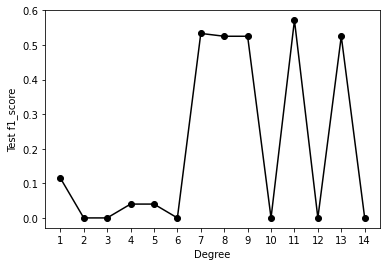

In [54]:
deg_list = np.arange(1,15)
score_list = []

for d in deg_list:
    X_train, X_test, y_train, y_test = pre_process(data, degree=d)
    clf = Perceptron(penalty='l2', alpha=1e-4)
    clf.fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    score_list.append(f1_score(y_test, y_test_hat))

plt.figure()
plt.plot(deg_list, score_list, marker='o', c='k')
plt.xlabel("Degree")
plt.xticks(np.arange(1,15))
plt.ylabel("Test f1_score")
plt.show()

# AdaBoost Classifiers

In [12]:
X_train, X_test, y_train, y_test = pre_process(data)
print(X_train.shape, y_train.shape)

(757, 8) (757,)


In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

clf = AdaBoostClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_micro')

print("%0.2f average train f1_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("f1_score of %0.2f" % (f1_score(y_test, y_test_hat)))

0.80 average train f1_score with a standard deviation of 0.03
f1_score of 0.81


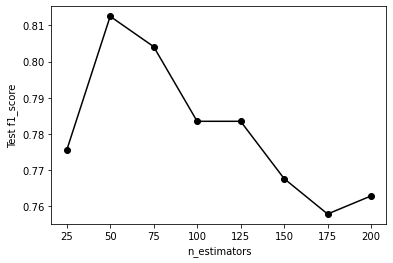

In [19]:
n_estimator_list = np.arange(25,225,25)
score_list = []

for n in n_estimator_list:
    X_train, X_test, y_train, y_test = pre_process(data)
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    score_list.append(f1_score(y_test, y_test_hat))

plt.figure()
plt.plot(n_estimator_list, score_list, marker='o', c='k')
plt.xlabel("n_estimators")
plt.xticks(np.arange(25,225,25))
plt.ylabel("Test f1_score")
plt.show()

The best model seems to be the one with `n_estimators = 50`.

In [15]:
adab_clf = AdaBoostClassifier(n_estimators=50)
adab_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [30]:
y_test_hat = adab_clf.predict(X_test)
adab_score = f1_score(y_test, y_test_hat)
adab_score

0.8125

## Random Forest Classifier

In [24]:
X_train, X_test, y_train, y_test = pre_process(data)
print(X_train.shape, y_train.shape)

(757, 8) (757,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_micro')

print("%0.2f average train f1_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("f1_score of %0.2f" % (f1_score(y_test, y_test_hat)))

0.82 average train f1_score with a standard deviation of 0.04
f1_score of 0.70


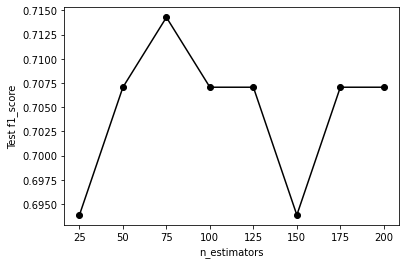

In [26]:
n_estimator_list = np.arange(25,225,25)
score_list = []

for n in n_estimator_list:
    X_train, X_test, y_train, y_test = pre_process(data)
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    score_list.append(f1_score(y_test, y_test_hat))

plt.figure()
plt.plot(n_estimator_list, score_list, marker='o', c='k')
plt.xlabel("n_estimators")
plt.xticks(np.arange(25,225,25))
plt.ylabel("Test f1_score")
plt.show()

The best model seems to be the one with `n_estimators = 75`.

In [27]:
rf_clf = RandomForestClassifier(n_estimators=75)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [31]:
y_test_hat = rf_clf.predict(X_test)
rf_score = f1_score(y_test, y_test_hat)
rf_score

0.7142857142857143

## Ensemble Classifier

Since, the best three models seem to `LogisticRegression`, `RandomForestClassifier` and `AdaBoostClassifer`, we will consider the weighted vote of the $3$ classifiers.

In [33]:
X_train, X_test, y_train, y_test = pre_process(data)
print(X_train.shape, y_train.shape)

(757, 8) (757,)


In [42]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

models = [('logreg', LogisticRegression(solver='liblinear')), ('adab', AdaBoostClassifier(n_estimators=50)), ('rf', RandomForestClassifier(n_estimators=75))]
weights = [logreg_score, adab_score, rf_score]
# creates a weighted sum ensemble
ensemble_clf = VotingClassifier(estimators=models, voting='soft', weights=weights)

scores = cross_val_score(ensemble_clf, X_train, y_train, cv=5, scoring='f1_micro')

print("%0.2f average train f1_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ensemble_clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print("f1_score of %0.2f" % (f1_score(y_test, y_test_hat)))

0.82 average train f1_score with a standard deviation of 0.02
f1_score of 0.71


# Evaluation

Finally, let's test the accuracy of the models on the dataset and list them down.

In [44]:
from sklearn.metrics import accuracy_score

models = [logreg_clf, adab_clf, rf_clf, ensemble_clf]

for model in models:
    y_test_hat = model.predict(X_test)
    print(str(model)+": "+str(accuracy_score(y_test, y_test_hat)))

LogisticRegression(solver='liblinear'): 0.8507462686567164
AdaBoostClassifier(): 0.8656716417910447
RandomForestClassifier(n_estimators=75): 0.7910447761194029
VotingClassifier(estimators=[('logreg', LogisticRegression(solver='liblinear')),
                             ('adab', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier(n_estimators=75))],
                 voting='soft',
                 weights=[0.7959183673469388, 0.8125, 0.7142857142857143]): 0.8208955223880597


Since, `AdaBoostClassifier` gives the best results individually. We will treat it as the final model.

# Final Classifer

We finally train the best classifier using all the data in our dataset.

In [50]:
def pre_process_2(data, degree=None):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder ,PolynomialFeatures
    from sklearn.impute import SimpleImputer

    data['Fam'] = np.where(data['Parch'] + data['SibSp'] > 0, 1, 0)
    target = np.array(data['Survived'])
    
    pass_col = ['Pclass', 'Fam']
    sex_col = ['Sex']
    age_col = ['Age']
    fare_col = ['Fare']
    embarked_col = ['Embarked']

    embarked_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe_embarked', OneHotEncoder())
    ])

    combined_pipe = ColumnTransformer([
        ('pass', 'passthrough', pass_col),
        ('sex', OrdinalEncoder(), sex_col),
        ('age', SimpleImputer(strategy='mean'), age_col),
        ('fare', StandardScaler(), fare_col),
        ('embarked', embarked_pipe, embarked_col)
    ])

    data = combined_pipe.fit_transform(data)
    if degree != None:
        data = PolynomialFeatures(degree=degree).fit_transform(data)

    return data, target

In [51]:
data = pd.read_csv("./titanic_data/train.csv")
X, y = pre_process_2(data)

In [53]:
final_clf = adab_clf
final_clf.fit(X,y)

AdaBoostClassifier()

In [46]:
test_data = pd.read_csv("./titanic_data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
def pre_process_3(data, degree=None):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder ,PolynomialFeatures
    from sklearn.impute import SimpleImputer

    data['Fam'] = np.where(data['Parch'] + data['SibSp'] > 0, 1, 0)
    
    pass_col = ['Pclass', 'Fam']
    sex_col = ['Sex']
    age_col = ['Age']
    fare_col = ['Fare']
    embarked_col = ['Embarked']

    embarked_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe_embarked', OneHotEncoder())
    ])

    fare_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scalar', StandardScaler())
    ])

    combined_pipe = ColumnTransformer([
        ('pass', 'passthrough', pass_col),
        ('sex', OrdinalEncoder(), sex_col),
        ('age', SimpleImputer(strategy='mean'), age_col),
        ('fare', fare_pipe, fare_col),
        ('embarked', embarked_pipe, embarked_col)
    ])

    data = combined_pipe.fit_transform(data)
    if degree != None:
        data = PolynomialFeatures(degree=degree).fit_transform(data)

    return data

In [64]:
X_test = pre_process_3(test_data)
X_test.shape

(418, 8)

In [66]:
y_test_hat = final_clf.predict(X_test)

In [68]:
y_test_hat.shape

(418,)

In [86]:
pd.Series(data=y_test_hat, name='Survived')

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [94]:
test_data['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [95]:
prediction_df = pd.concat([test_data['PassengerId'], pd.Series(data=y_test_hat, name='Survived')], axis=1)
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [96]:
# Export the results to a .csv file
prediction_df.to_csv(r'./submission.csv', index=False)